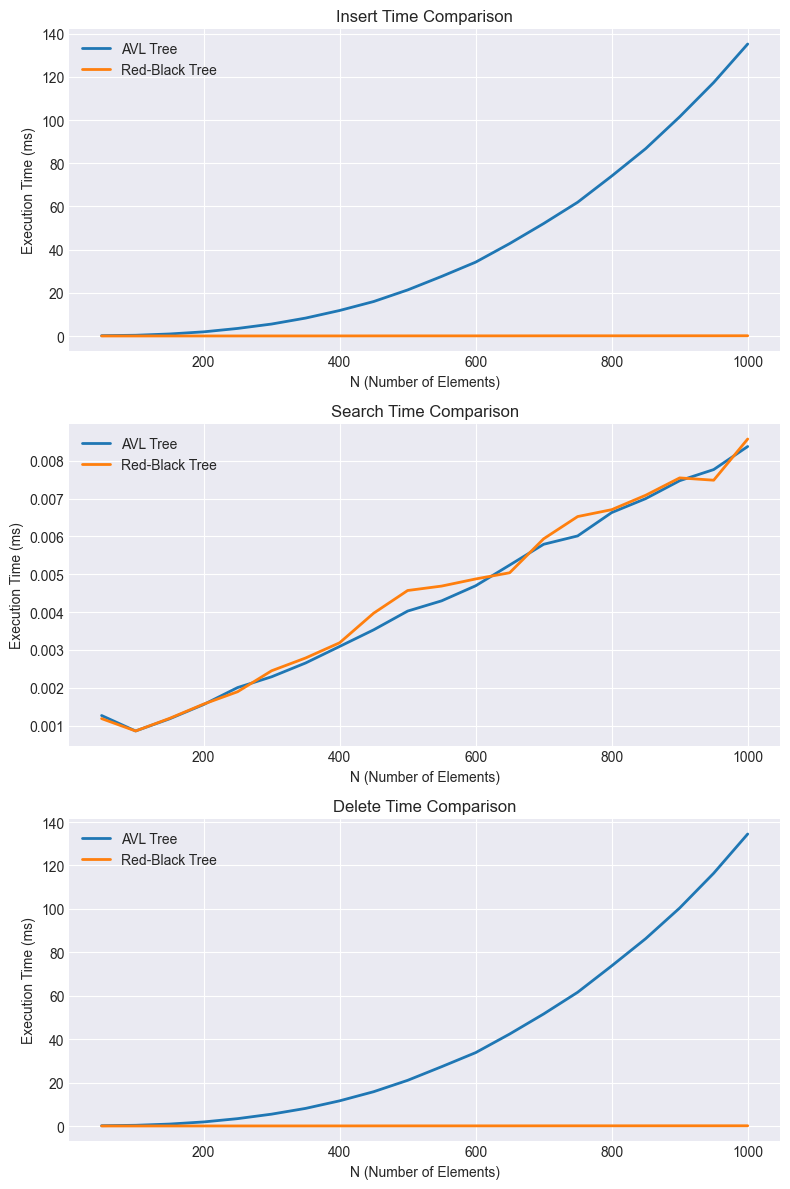

In [6]:
# --- Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Read the combined CSV file ---
df = pd.read_csv('benchmark_results.csv')

# --- Define operations ---
operations = ['Insert', 'Search', 'Delete']

# --- Plot setup ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# --- Loop through operations ---
for i, op in enumerate(operations):
    avl_col = f'AVL_{op}_Time'
    rbt_col = f'RBT_{op}_Time'
    
    axes[i].plot(df['N'], df[avl_col], linewidth=2, label='AVL Tree')
    axes[i].plot(df['N'], df[rbt_col], linewidth=2, label='Red-Black Tree')
    
    axes[i].set_xlabel('N (Number of Elements)')
    axes[i].set_ylabel('Execution Time (ms)')
    axes[i].set_title(f'{op} Time Comparison')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()
